In [1]:
import pickle
import utils
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
CURRENT_MODEL = None
N_dim = 100


x1_min = -10
x1_max = 10

x2_min = 20
x2_max = 40

test_min = -1
test_max= 1

limits = [x1_min, x1_max, x2_min, x2_max]
test_limits = [test_min, test_max]

num_samples = 50

In [2]:
from utils import MLP
from utils import CMA_info

In [3]:
with open('data_size_experiment_5_repeats_4_dim_standardized.p','rb') as F:
    all_info = pickle.load(F)

In [4]:
# with open('../data_dimension_experiment_20_2.p','rb') as F:
#     all_info_20 = pickle.load(F)

In [5]:
# len(all_info_20)

In [6]:
# for i in range(10):
#     all_info[i][0][20] = all_info_20[i][0][20]
#     all_info[i][1][20] = all_info_20[i][1][20]

In [10]:
all_info[0]

[{1000: MLP(
    (layers): Sequential(
      (0): Linear(in_features=4, out_features=4, bias=True)
      (1): Tanh()
      (2): Linear(in_features=4, out_features=2, bias=True)
    )
  ),
  10000: MLP(
    (layers): Sequential(
      (0): Linear(in_features=4, out_features=4, bias=True)
      (1): Tanh()
      (2): Linear(in_features=4, out_features=2, bias=True)
    )
  ),
  100000: MLP(
    (layers): Sequential(
      (0): Linear(in_features=4, out_features=4, bias=True)
      (1): Tanh()
      (2): Linear(in_features=4, out_features=2, bias=True)
    )
  ),
  1000000: MLP(
    (layers): Sequential(
      (0): Linear(in_features=4, out_features=4, bias=True)
      (1): Tanh()
      (2): Linear(in_features=4, out_features=2, bias=True)
    )
  )},
 {1000: <utils.CMA_info at 0x2b961bf675e0>,
  10000: <utils.CMA_info at 0x2b961bf77ac0>,
  100000: <utils.CMA_info at 0x2b961bfa3880>,
  1000000: <utils.CMA_info at 0x2b961bfb4df0>}]

In [12]:
dist_means = []
dist_stds = []
attack_rate_means = []
attack_rate_stds = []

for n_dim in [1000, 10000, 100000, 1000000]:
    all_distances = []
    all_attack_rates = []

    for i in range(5):
        all_distances.extend(all_info[i][1][n_dim].distances)        
        num_attacks = len(all_info[i][1][n_dim].in_dist_advs)
        num_total = len(all_info[i][1][n_dim].starts)
        all_attack_rates.extend([num_attacks/num_total])
        
    attack_rate_means.append(np.mean(all_attack_rates))
    attack_rate_stds.append(np.std(all_attack_rates))
    dist_mean = np.mean(all_distances)
    dist_std = np.std(all_distances)
    dist_means.append(dist_mean)
    dist_stds.append(dist_std)

/om5/user/smadan/miniconda3/envs/diff_rendering_ml/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/om5/user/smadan/miniconda3/envs/diff_rendering_ml/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/om5/user/smadan/miniconda3/envs/diff_rendering_ml/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/om5/user/smadan/miniconda3/envs/diff_rendering_ml/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/om5/user/smadan/miniconda3/envs/diff_rendering_ml/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.typ

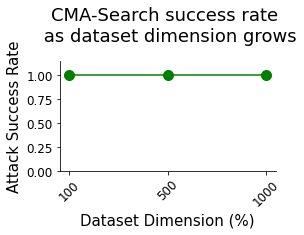

In [9]:
plt.figure(figsize=(4,3.5))
plt.errorbar(range(3), attack_rate_means, attack_rate_stds, marker='o',color='green', markersize=10)
plt.ylim(0,1.15)
plt.xlabel('Dataset Dimension (%)', fontsize=15)
plt.ylabel('Attack Success Rate', fontsize=15)
plt.xticks(range(3),[100, 500, 1000], rotation=45, fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.title('CMA-Search success rate \n as dataset dimension grows',fontsize=18, y=1.12)
plt.tight_layout()
plt.show()

In [10]:
# plt.errorbar(range(4), attack_rate_means, attack_rate_stds, marker = 'o', capsize=5)
# plt.xticks(range(4),[20, 100, 500, 1000])
# plt.title('Attack rate for adv sample as a function of dataset dims')
# plt.xlabel('Dataset Dimensions')
# plt.ylabel('Distance')
# plt.show()

In [11]:
# plt.errorbar(range(3), dist_means, dist_stds, marker = 'o', capsize=5)
# plt.xticks(range(3),[100, 500, 1000])
# plt.title('Distance to adv sample as a function of dataset dims')
# plt.xlabel('Dataset Dimensions')
# plt.xlabel('Distance')
# plt.ylim(0,5)
# plt.show()

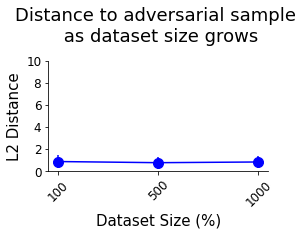

In [13]:
plt.figure(figsize=(4,3.5))
plt.errorbar(range(3), dist_means, dist_stds, marker='o',color='blue', markersize=10)
# plt.plot(range(0,4), material_results, marker='o',color='blue', markersize=10, label='Materials')
# plt.plot(range(0,4), viewpoint_results, marker='o',color='red', markersize=10, label='Viewpoints')
plt.ylim(0,10)
# plt.title('Generalization to OOD domains',fontsize=18, y=1.12);
plt.xlabel('Dataset Size (%)', fontsize=15)
plt.ylabel('L2 Distance', fontsize=15)
# plt.legend(loc="lower right", fontsize=12)
plt.xticks(ticks = range(3), labels = [100,500,1000], rotation=45, fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.title('Distance to adversarial sample \n as dataset size grows',fontsize=18, y=1.12)
plt.tight_layout()
plt.show()